# INTRODUCTION
In this data analysis report, I usually focus on feature visualization and selection as a different from other kernels. Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components.

# Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
print(check_output(["ls", "input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

breast-cancer-wisconsin.data
breast-cancer-wisconsin.names
Index
unformatted-data
wdbc.data
wdbc.names
wpbc.data
wpbc.names



In [2]:
data = pd.read_csv('input/wdbc.data')
new_names = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']
data.columns = new_names

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

In [24]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.diagnosis                          # M or B 
list = ['id','diagnosis'] #['Unnamed: 32','id','diagnosis']
x = data.drop(list,axis = 1 )
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


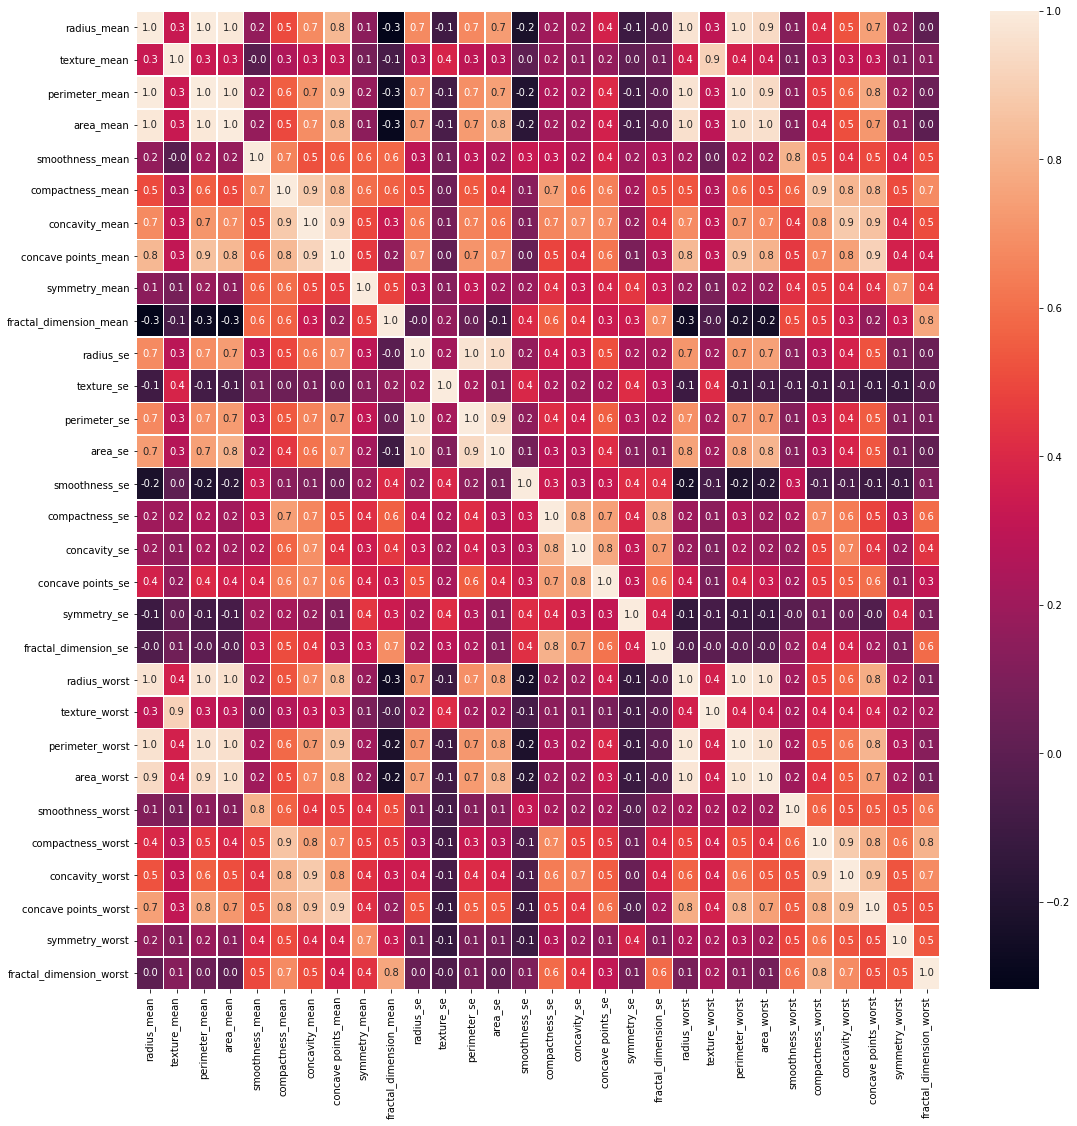

In [6]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## 1) Feature selection with correlation

As it can be seen in map heat figure **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier. 

**Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.  **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**. **texture_mean and texture_worst are correlated** and I use **texture_mean**. **area_worst and area_mean** are correlated, I use **area_mean**.




In [7]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later 
x_1.head()

    

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
1,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
2,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
3,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678
4,15.70,477.1,0.12780,0.1578,0.2087,0.07613,0.8902,27.19,0.007510,0.03672,0.02165,0.005082,0.1791,0.5355,0.3985,0.12440


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

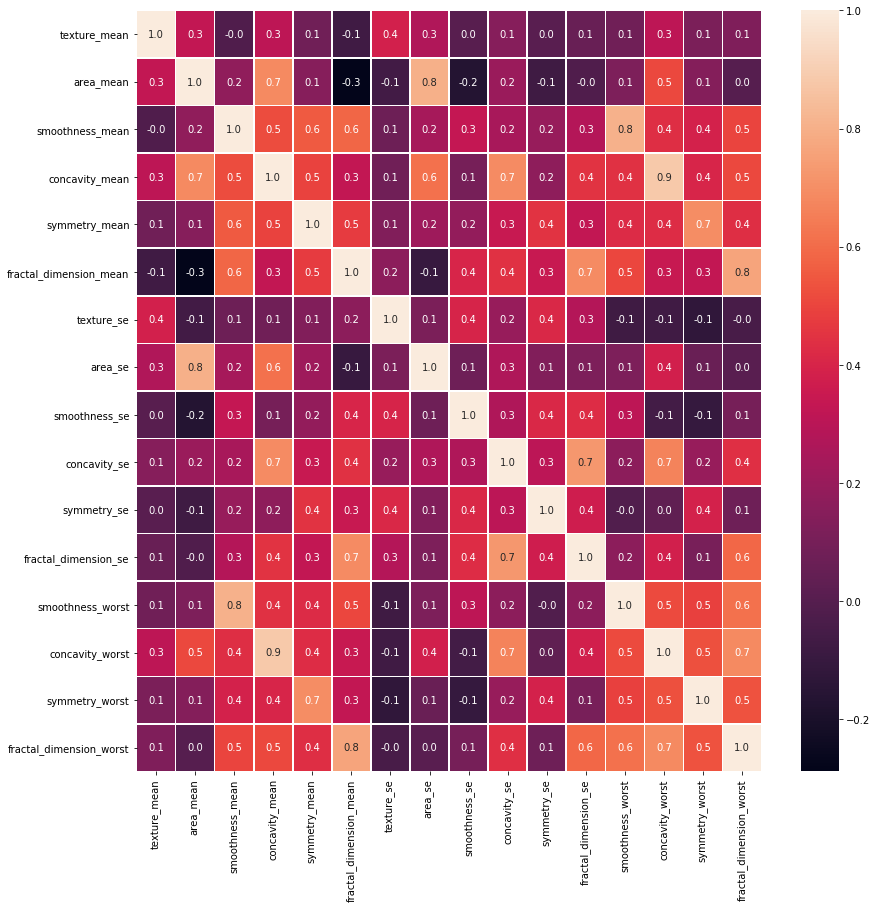

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

In [9]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
from itertools import cycle
def crossvalidationPlots(model, x, y, group1, group2, seed):
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    #model predicts probabilities of positive class
    y_proba = y_pred=cross_val_predict(model, x, y, cv=kfold, method='predict_proba')
    if len(model.classes_)!=2:
        raise ValueError('A binary class problem is required')
    if model.classes_[1] == 1:
        y_pred_prob = y_proba[:,1]
    elif model.classes_[0] == 1:
        y_pred_prob = y_proba[:,0]
    y_pred=cross_val_predict(model, x, y, cv=kfold)
    #1 - cnf matrix
    cnf_matrix = confusion_matrix(y, y_pred)
    plt.figure(figsize=[15,4])
    plt.subplot(121)
    ax=sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, fmt='g')
    ax.xaxis.set_label_position("top")
    title='Confusion matrix for classifier'
    plt.title(title, y=1.1, size=15)
    plt.ylabel('True', size=13)
    plt.xlabel('Predicted', size=13)
    #2 - roc curve
    class_lookup = {0: group1, 1: group2}
    enc = preprocessing.MultiLabelBinarizer()
    Y_one_hot = enc.fit_transform(y.astype(str))
    n_classes = Y_one_hot.shape[1]
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    colors = cycle(['orange', 'red', 'black'])

    plt.subplot(122)
    plt.plot([0, 1], [0, 1],'r--', color='grey')
    for i, color in zip(range(n_classes), colors):
        fpr[i], tpr[i], _ = roc_curve(Y_one_hot[:, i], y_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(
                    class_lookup[i], roc_auc[i]))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', size=13)
    plt.ylabel('True Positive Rate', size=13)    
    titleName='ROC-Curve for Classifier'
    plt.title(titleName, size=15)
    plt.legend(loc='lower right', fontsize=10)
    plt.subplots_adjust(wspace=.2)
    plt.show()
    print('Cross validation accuracy:')
    print('\t', accuracy_score(y, y_pred))
    print('\nCross validation classification report\n')
    print(classification_report(y, y_pred))

In [10]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

In [11]:
from sklearn import svm
from sklearn.svm import SVC, LinearSVC

clf_svm = svm.SVC(kernel='linear', probability=True)
clf_svm = clf_svm.fit(x_train,y_train)

from sklearn.linear_model import LogisticRegression
clf_lr = LogisticRegression(solver='liblinear', max_iter=100000)
clf_lr = clf_lr.fit(x_train, y_train)
#, solver='liblinear', 

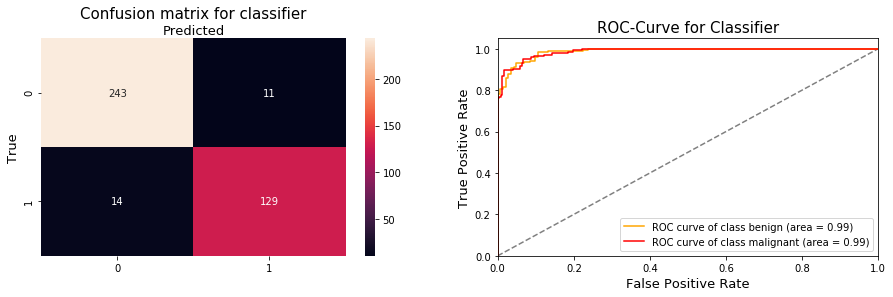

Cross validation accuracy:
	 0.9370277078085643

Cross validation classification report

              precision    recall  f1-score   support

           B       0.95      0.96      0.95       254
           M       0.92      0.90      0.91       143

    accuracy                           0.94       397
   macro avg       0.93      0.93      0.93       397
weighted avg       0.94      0.94      0.94       397



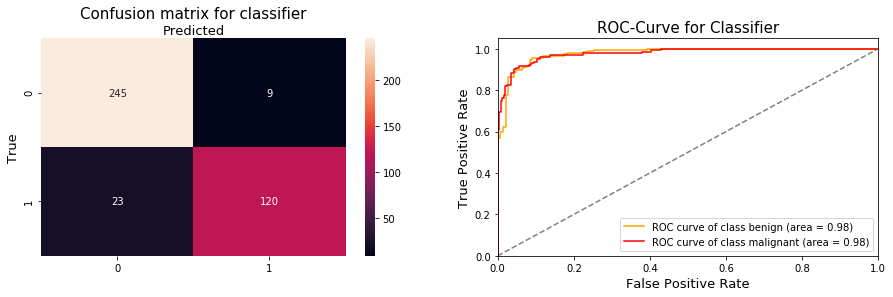

Cross validation accuracy:
	 0.9193954659949622

Cross validation classification report

              precision    recall  f1-score   support

           B       0.91      0.96      0.94       254
           M       0.93      0.84      0.88       143

    accuracy                           0.92       397
   macro avg       0.92      0.90      0.91       397
weighted avg       0.92      0.92      0.92       397



In [12]:
crossvalidationPlots(clf_svm, x_train, y_train, 'benign', 'malignant', 42)
crossvalidationPlots(clf_lr, x_train, y_train, 'benign', 'malignant', 42)

In [13]:
# udfs ----

# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)


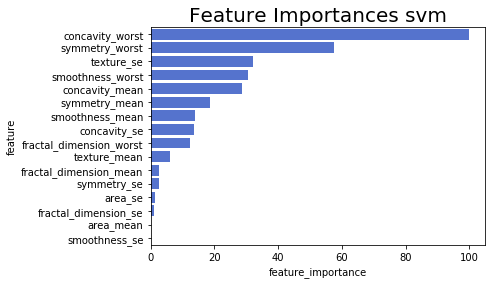

In [14]:
feature_importances = abs(clf_svm.coef_[0])
feature_importances = 100.0 * (feature_importances / feature_importances.max())
indices = np.argsort(feature_importances)[::-1]
var_imp_plot(imp_df(x_train.columns[indices], feature_importances[indices]), 'Feature Importances svm')


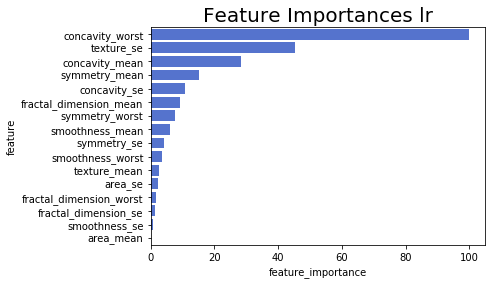

In [15]:
feature_importances = abs(clf_lr.coef_[0])
feature_importances = 100.0 * (feature_importances / feature_importances.max())
indices = np.argsort(feature_importances)[::-1]
var_imp_plot(imp_df(x_train.columns[indices], feature_importances[indices]), 'Feature Importances lr')

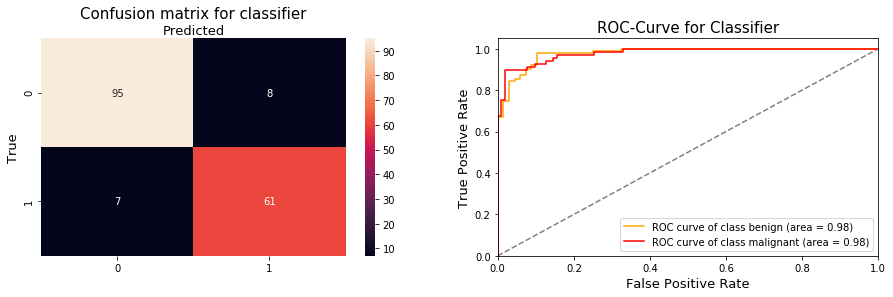

Cross validation accuracy:
	 0.9122807017543859

Cross validation classification report

              precision    recall  f1-score   support

           B       0.93      0.92      0.93       103
           M       0.88      0.90      0.89        68

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



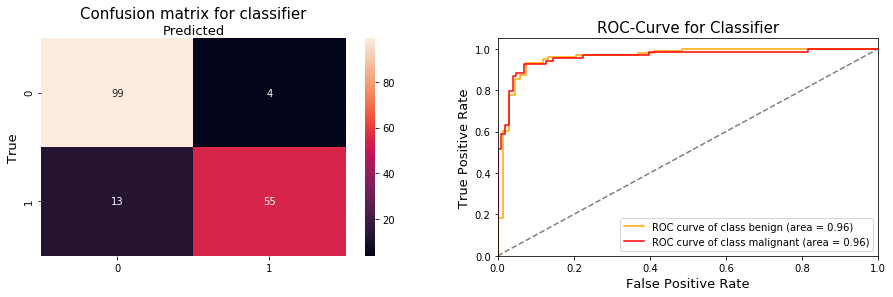

Cross validation accuracy:
	 0.9005847953216374

Cross validation classification report

              precision    recall  f1-score   support

           B       0.88      0.96      0.92       103
           M       0.93      0.81      0.87        68

    accuracy                           0.90       171
   macro avg       0.91      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



In [16]:
crossvalidationPlots(clf_svm, x_test, y_test, 'benign', 'malignant', 42)

crossvalidationPlots(clf_lr, x_test, y_test, 'benign', 'malignant', 42)

In [17]:
data_test1 = pd.read_csv('input/wpbc.data')
new_names = ['id', 'status', 'time', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'tsize', 'pnodes']
data_test1.columns = new_names
diagnosisList= ['M' if data_test1['status'].values[i]=='R' else 'B' for i in range(0,len(data_test1),1)]
data_test1['diagnosis'] = diagnosisList
# y includes our labels and x includes our features
y_test1 = data_test1.diagnosis                          # M or B 
list=['status', 'time', 'tsize', 'pnodes','id', 'diagnosis']
x_test1 = data_test1.drop(list,axis = 1 )
x_test1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,...,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067
2,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,12.75,15.29,84.60,502.7,0.11890,0.1569,0.1664,0.07666,0.1995,0.07164,...,15.51,20.37,107.30,733.2,0.1706,0.4196,0.5999,0.1709,0.3485,0.11790


In [ ]:
crossvalidationPlots(clf_svm, x_test1, y_test1, 'benign', 'malignant', 42)

crossvalidationPlots(clf_lr, x_test1, y_test1, 'benign', 'malignant', 42)

In [ ]:
data_test2 = pd.read_csv('input/breast-cancer-wisconsin.data')
new_names=['id', 'clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
data_test2.columns = new_names